# Comprehensive Image Captioning via Scene Graph Decomposition, ECCV 2020

In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "7"

Set a random seed for a better reproducibility

In [2]:
import random

import numpy as np
import torch

random_seed = 42
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

Load the model information needed for inference.

In [3]:
import misc.utils as utils

infos_path = "pretrained/sub_gc_flickr/infos_topdown-16000.pkl"
with open(infos_path, "rb") as f:
    infos = utils.pickle_load(f)

infos

{'vocab': {'5988': 'chasing',
  '5989': 'lines',
  '5982': 'waters',
  '5983': 'collection',
  '5980': 'buildings',
  '5981': 'de',
  '5986': 'terrier',
  '5987': 'cuddling',
  '5984': 'united',
  '5985': 'bluff',
  '6796': 'ocean',
  '6797': 'waterskis',
  '6794': 'tassel',
  '6795': 'shortly',
  '6792': 'dozing',
  '6793': 'cycle',
  '6790': 'microphone',
  '6791': 'characters',
  '6798': 'mother',
  '6799': 'hearts',
  '6294': 'vibrant',
  '270': 'bust',
  '271': 'mens',
  '272': 'bush',
  '273': 'dangles',
  '274': 'touched',
  '275': 'rice',
  '276': 'plate',
  '277': 'warmers',
  '278': 'klein',
  '279': 'honda',
  '2143': 'chef',
  '2142': 'horn',
  '3519': 'yankees',
  '3518': 'deli',
  '3513': 'docked',
  '3512': 'anxious',
  '3511': 'older',
  '3510': 'plugs',
  '3517': 'clears',
  '3516': 'massage',
  '3515': 'grind',
  '3514': 'cruz',
  '2688': 'super',
  '2689': 'live',
  '2684': 'marker',
  '2685': 'market',
  '2686': 'buttons',
  '2687': 'canon',
  '2680': 'marked',
  '2

In [5]:
from argparse import Namespace

config = {
    "model": "pretrained/sub_gc_flickr/model-16000.pth",
    "cnn_model": "resnet101",
    "infos_path": "pretrained/sub_gc_flickr/infos_topdown-16000.pkl",
    "batch_size": 1,
    "num_images": -1,
    "language_eval": 1,
    "dump_images": 0,
    "dump_json": 1,
    "dump_path": 0,
    "sample_max": 1,
    "beam_size": 1,
    "max_length": 20,
    "length_penalty": "",
    "group_size": 1,
    "diversity_lambda": 0.5,
    "temperature": 1.0,
    "decoding_constraint": 0,
    "block_trigrams": 0,
    "remove_bad_endings": 0,
    "image_folder": "",
    "image_root": "",
    "input_fc_dir": "data/cocobu_fc",
    "input_att_dir": "data/cocobu_att",
    "input_box_dir": "data/cocobu_box",
    "input_label_h5": "data/flickr30ktalk_label.h5",
    "input_json": "data/flickr30ktalk.json",
    "split": "test",
    "coco_json": "",
    "id": "topdown",
    "verbose_beam": 1,
    "verbose_loss": 0,
    "use_gpn": 1,
    "embed_dim": 300,
    "gcn_dim": 1024,
    "noun_fuse": 1,
    "pred_emb_type": 1,
    "gcn_layers": 2,
    "gcn_residual": 2,
    "gcn_bn": 0,
    "sampling_prob": 0.0,
    "obj_name_path": "data/object_names_1600-0-20.npy",
    "rel_name_path": "data/predicate_names_1600-0-20.npy",
    "use_MRNN_split": False,
    "use_gt_subg": False,
    "use_greedy_subg": False,
    "obj_num": 37,
    "rel_num": 65,
    "num_workers": 6,
    "test_LSTM": 1,
    "use_topk_sampling": 0,
    "topk_temp": 0.6,
    "the_k": 3,
    "gpn_nms_thres": 0.75,
    "gpn_max_subg": 10,
    "only_sent_eval": 0,
    "oracle_num": 1,
    "return_att": 1,
    "sct": 0,
    "grad_clip": 0.1,
    "vocab_size": 8511,
    "noamopt_warmup": 2000,
    "scheduled_sampling_increase_prob": 0.05,
    "scheduled_sampling_max_prob": 0.25,
    "scheduled_sampling_increase_every": 5,
    "fc_feat_size": 2048,
    "use_att": True,
    "current_lr": 4.294967296000003e-05,
    "noamopt_factor": 1,
    "seq_per_img": 5,
    "num_layers": 1,
    "max_epochs": 40,
    "weight_decay": 0,
    "norm_att_feat": 0,
    "checkpoint_path": "logs/joint_train_63",
    "learning_rate_decay_every": 3,
    "use_bn": 0,
    "input_encoding_size": 1000,
    "att_feat_size": 2048,
    "caption_model": "topdown",
    "use_box": 0,
    "norm_box_feat": 0,
    "rnn_type": "lstm",
    "scheduled_sampling_start": 0,
    "cider_reward_weight": 1,
    "optim": "adam",
    "train_only": 0,
    "learning_rate": 0.0005,
    "drop_prob_lm": 0.5,
    "self_critical_after": -1,
    "use_fc": True,
    "att_hid_size": 512,
    "losses_log_every": 25,
    "label_smoothing": 0,
    "learning_rate_decay_rate": 0.8,
    "ss_prob": 0.25,
    "logit_layers": 1,
    "reduce_on_plateau": False,
    "rnn_size": 1000,
    "seq_length": 20,
    "optim_beta": 0.999,
    "learning_rate_decay_start": 0,
    "noamopt": False,
    "cached_tokens": "coco-train-idxs",
    "val_images_use": 5000,
    "save_history_ckpt": 1,
    "optim_alpha": 0.9,
    "save_checkpoint_every": 4000,
    "optim_epsilon": 1e-08,
    "load_best_score": 1,
    "bleu_reward_weight": 0,
}


Load model and dataset.

In [6]:
import models
from dataloaders.dataloader_test import DataLoader

opt = Namespace(**config)
model = models.setup(opt)
model.load_state_dict(torch.load(opt.model))
model.cuda()

crit = utils.LanguageModelCriterion()
loader = DataLoader(opt)
loader.ix_to_word = infos["vocab"]  # ix -> word mapping

loading word vectors from data/glove.6B.300d.pt


/home/gabriel.santos/Sub-GC/misc/utils.py:422: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(fname_pt)


Fail on __background__
loading word vectors from data/glove.6B.300d.pt
Fail on __background__


/tmp/ipykernel_1422147/3805898555.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(opt.model))


DataLoader loading json file:  data/flickr30ktalk.json
vocab size is  8511
DataLoader loading h5 file:  data/flickr30ktalk_label.h5
max sequence length in data is 20
read 31014 image features
assigned 29000 images to split train
assigned 1014 images to split val
assigned 1000 images to split test


Grounding information

In [7]:
from collections import defaultdict

num_images = config["num_images"]
split = config["split"]
lang_eval = config["language_eval"]
os.environ["REMOVE_BAD_ENDINGS"] = str(config["remove_bad_endings"])  # a global configuration

gvd_all_dict = np.load("data/gvd_all_dict.npy", allow_pickle=True, encoding="latin1").tolist()
ind_to_wd = gvd_all_dict["ind_to_wd"]
wd_to_lemma = gvd_all_dict["wd_to_lemma"]
lemma_det_id_dict = gvd_all_dict["lemma_det_id_dict"]
det_id_to_det_wd = gvd_all_dict["det_id_to_det_wd"]
grd_output = defaultdict(list)
model_path = config["infos_path"].split("/")
consensus_rerank_file = model_path[0] + "/" + model_path[1] + "/consensus_rerank_ind.npy"
grd_sGPN_consensus = True if os.path.isfile(consensus_rerank_file) else False

### Inference

In [191]:
import json

from misc.grd_utils import get_grounding_material

n = 0
predictions = []
model.eval()
loader.reset_iterator(split)

while True:
    data = loader.get_batch(split)
    n = n + loader.batch_size

    tmp = [
        data["fc_feats"],
        data["att_feats"],
        data["labels"],
        data["masks"],
        data["att_masks"],
        data["trip_pred"],
        data["obj_dist"],
        data["obj_box"],
        data["rel_ind"],
        data["pred_fmap"],
        data["pred_dist"],
        data["gpn_obj_ind"],
        data["gpn_pred_ind"],
        data["gpn_nrel_ind"],
        data["gpn_pool_mtx"],
    ]
    tmp = [_.cuda() if _ is not None else _ for _ in tmp]
    (
        fc_feats,
        att_feats,
        labels,
        masks,
        att_masks,
        trip_pred,
        obj_dist,
        obj_box,
        rel_ind,
        pred_fmap,
        pred_dist,
        gpn_obj_ind,
        gpn_pred_ind,
        gpn_nrel_ind,
        gpn_pool_mtx,
    ) = tmp

    # send all subgraphs of a image to generate sentences
    with torch.no_grad():
        seqq, seqLogprobs, subgraph_score, keep_nms_ind, att_weights = model(
            fc_feats,
            att_feats,
            att_masks,
            trip_pred,
            obj_dist,
            obj_box,
            rel_ind,
            pred_fmap,
            pred_dist,
            gpn_obj_ind,
            gpn_pred_ind,
            gpn_nrel_ind,
            gpn_pool_mtx,
            opt=config,
            mode="sample",
        )

        # sub-graph captioning model
        sorted_score, sort_ind = torch.sort(subgraph_score, descending=True)
        seq = seqq[sort_ind].data
        subgraph_score = sorted_score.data
        sorted_subgraph_ind = keep_nms_ind[sort_ind]  # the indices are to index sub-graph in original order

    print("\nNo {}:".format(n))
    sents = utils.decode_sequence(loader.get_vocab(), seq)  # use the first beam which has highest cumulative score

    # save best sentence generated by all subgraphs of a image
    entry = {"image_id": data["infos"][0]["id"], "caption": []}
    entry["subgraph_score"] = subgraph_score.cpu().numpy()
    entry["sorted_subgraph_ind"] = sorted_subgraph_ind.cpu().numpy()

    for k, sent in enumerate(sents):
        entry["caption"].append(sent)
    predictions.append(entry)

    best_ind = torch.argmax(subgraph_score).item()
    print("keeping {} subgraphs".format(len(sents)))
    print("best subgraph score sentence: \n{}".format(entry["caption"][best_ind]))
    print("--" * 20)

    # collect grounding material for grounding evaluation
    get_grounding_material(
        config["infos_path"],
        data,
        sents,
        sorted_subgraph_ind,
        att_weights,
        sort_ind,
        wd_to_lemma,
        lemma_det_id_dict,
        det_id_to_det_wd,
        grd_output,
        use_full_graph=not model.gpn,
        grd_sGPN_consensus=grd_sGPN_consensus,
    )

    if data["bounds"]["wrapped"]:
        break
    if num_images >= 0 and n >= num_images:
        break

# after model testing, save generated results
save_path = config["infos_path"].split("/")

# sub-graph captioning
np.save(
    save_path[0] + "/" + save_path[1] + "/" + "captions_{}.npy".format(save_path[-1].split("-")[1].split(".")[0]),
    predictions,
)

with open(save_path[0] + "/" + save_path[1] + "/" + "grounding_file.json", "w") as f:
    json.dump(
        {"results": grd_output, "eval_mode": "gen", "external_data": {"used": True, "details": "grounding experiment"}},
        f,
    )


In [ ]:
from PIL import Image, ImageDraw


def draw_single_box(pic, box, color="red", draw_info=None):
    draw = ImageDraw.Draw(pic)
    x1, y1, x2, y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    draw.rectangle(((x1, y1), (x2, y2)), outline=color)
    if draw_info:
        draw.rectangle(((x1, y1), (x1 + 50, y1 + 10)), fill=color)
        info = draw_info
        draw.text((x1, y1), info)


def draw_image(img_path, boxes, labels):
    pic = Image.open(img_path)
    num_obj = boxes.shape[0]
    for i in range(num_obj):
        info = labels[i]
        draw_single_box(pic, boxes[i], draw_info=info)
    display(pic)

    return None


In [175]:
predictions[0]


{'image_id': 1007129816,
 'caption': ['a man with a hat and a beard is wearing a straw hat',
  'a man wearing a hat and sunglasses',
  'a man wearing a hat and sunglasses',
  'a man wearing a hat and sunglasses',
  'a man wearing a hat and sunglasses',
  'a man wearing a straw hat and sunglasses',
  'a man wearing a hat and sunglasses',
  'a man wearing a hat and sunglasses',
  'a man wearing a hat and sunglasses',
  'a person in a red jacket is a white shirt'],
 'subgraph_score': array([9.9999952e-01, 7.2135472e-01, 3.9193264e-01, 1.6828698e-01,
        1.5849289e-01, 1.0423937e-01, 1.3640688e-03, 8.2646630e-04,
        2.9638884e-04, 2.3086193e-04], dtype=float32),
 'sorted_subgraph_ind': array([149, 248, 251, 250, 218, 201, 212, 240, 150,   7])}

In [189]:
grd_output[predictions[0]["image_id"]]


[{'clss': ['man', 'hat', 'beard', 'hat'],
  'idx_in_sent': [1, 4, 7, 12],
  'bbox': [[75.431884765625,
    46.000816345214844,
    383.73541259765625,
    460.231689453125],
   [141.25717163085938,
    44.80467224121094,
    429.50567626953125,
    213.0893096923828],
   [225.41580200195312,
    91.97417449951172,
    395.2682189941406,
    167.76112365722656],
   [225.41580200195312,
    91.97417449951172,
    395.2682189941406,
    167.76112365722656]]}]

['a man with a hat and a beard is wearing a straw hat', 'a man wearing a hat and sunglasses', 'a man wearing a hat and sunglasses', 'a man wearing a hat and sunglasses', 'a man wearing a hat and sunglasses', 'a man wearing a straw hat and sunglasses', 'a man wearing a hat and sunglasses', 'a man wearing a hat and sunglasses', 'a man wearing a hat and sunglasses', 'a person in a red jacket is a white shirt']
==> Best caption: a man with a hat and a beard is wearing a straw hat


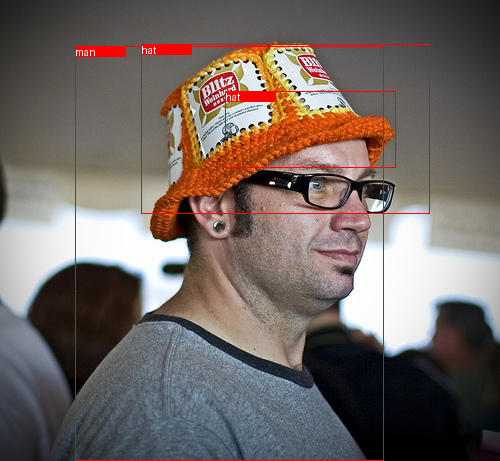

['a dog runs through a field', 'a dog runs through the grass', 'a dog runs through a fenced in area', 'a dog runs through the grass', 'a dog runs through the grass', 'a dog runs through the grass', 'a dog jumps over a fence', 'a dog runs through the grass', 'a dog runs through the grass', 'a dog runs through the grass']
==> Best caption: a dog runs through a field


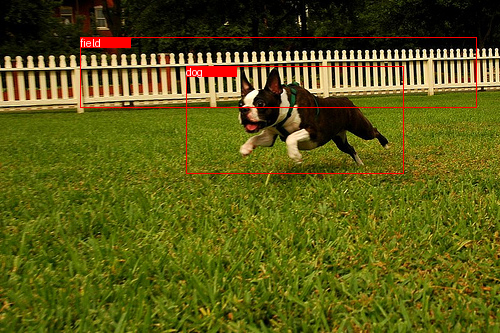

['a woman in a white karate gi is practicing martial arts', 'a martial arts martial arts martial arts class is practicing martial arts', 'a young girl in a karate uniform is practicing martial arts', 'a young girl in a white karate gi is practicing martial arts', 'a woman in a white karate gi is practicing martial arts', 'a young girl in a white karate gi is practicing martial arts', 'two young girls in white karate uniforms are practicing martial arts', 'a young man in a karate uniform is practicing martial arts', 'a young woman in a karate uniform is practicing martial arts', 'a young girl in a karate uniform is practicing martial arts']
==> Best caption: a woman in a white karate gi is practicing martial arts


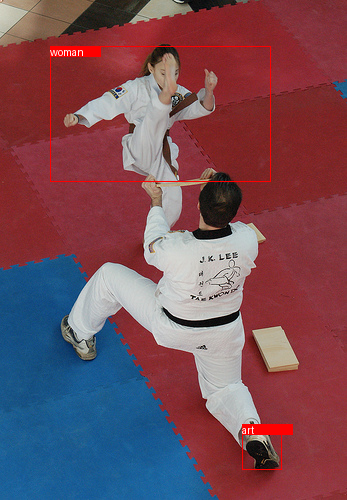

['a group of people are standing in the snow', 'a group of people are walking in the snow', 'a group of people in helmets and helmets are walking in the snow', 'a group of people in helmets and helmets are standing in the snow', 'a group of people are ice skating', 'a group of people in winter coats are standing in the snow', 'a group of people in winter coats are walking in the snow', 'a group of people in winter coats are standing in the snow', 'a group of men and women are walking in the snow', 'a man and a woman are walking in the snow']
==> Best caption: a group of people are standing in the snow


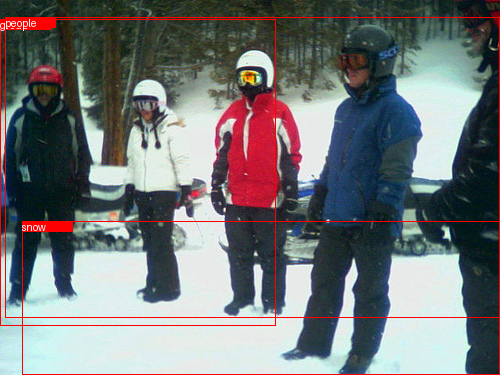

['two men are working on a roof', 'two men are working on a roof', 'two men are working on a roof', 'two people are working on a roof', 'two men are working on a roof', 'two men are working on a roof', 'two men are working on a roof', 'two men are working on a roof', 'two men are working on a roof', 'two men are working on a roof']
==> Best caption: two men are working on a roof


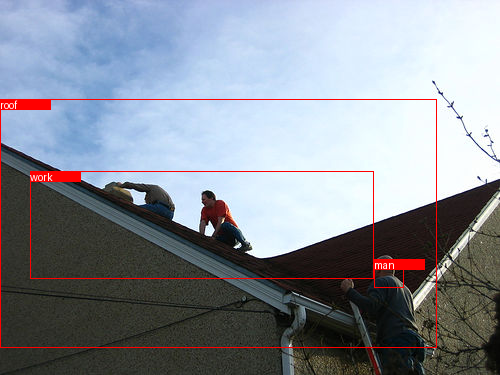

In [186]:
for i in range(5):    
    image_id = predictions[i]["image_id"]
    captions = predictions[i]["caption"]
    print(captions)
    best_ind = np.argmax(predictions[i]["subgraph_score"]).item()
    print("==> Best caption:", captions[best_ind])
    
    image_path = f"/hadatasets/clip_pt/images/flickr30k/flickr30k-images/{image_id}.jpg"
    draw_image(image_path, torch.Tensor(grd_output[image_id][0]["bbox"]), grd_output[image_id][0]["clss"])
    print("=" * 100)
